In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline

print(tf.__version__)

/Users/spencerdixon/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.9.0


In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalise values

x_train = x_train / 255.
x_test  = x_test / 255.

In [4]:
classification_dict = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

AxesImage(54,36;334.8x217.44)
Classification: Ankle boot (9))


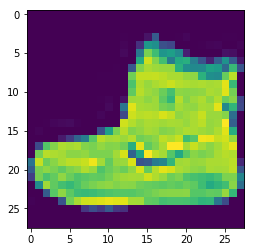

In [5]:
print(plt.imshow(x_train[0]))

label = y_train[0]

print("Classification: {} ({}))".format(classification_dict[label], label))

In [6]:
input_shape = (28, 28) # Image shape
outputs     = 10       # Number of classes

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=input_shape),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(outputs, activation=tf.nn.softmax)
])

In [7]:
model.compile(
    optimizer=tf.train.AdamOptimizer(),
    loss='sparse_categorical_crossentropy'
)

In [8]:
# Let's write a callback to stop the training when we reach a certain level of accuracy

class EarlyStopper(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('loss') < 0.4):
            print("Loss less than 0.4, stopping training...")
            self.model.stop_training = True

In [9]:
callback = EarlyStopper()

model.fit(x_train, y_train, epochs=10, callbacks=[callback])

Epoch 1/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.4969
Epoch 2/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.3762
Loss less than 0.4, stopping training...


In [10]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 19us/step


0.4004726722478867